In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt


batch_size = 32
num_epochs = 200
kernel_size = 4
pool_size = 2
conv_depth_1 = 32 
conv_depth_2 = 64   
drop_prob_1 = 0.25    
drop_prob_2 = 0.5     
hidden_size = 512



(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data
num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_train) # Normalise data to [0, 1] range
Y_train = utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras

# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)

# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1)

model.evaluate(X_test, Y_test, verbose=1)



Epoch 1/200
1407/1407 [==============================] - 45s 9ms/step - loss: 1.8561 - accuracy: 0.3115 - val_loss: 1.3007 - val_accuracy: 0.5230
Epoch 2/200
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2999 - accuracy: 0.5313 - val_loss: 1.0639 - val_accuracy: 0.6154
Epoch 3/200
1407/1407 [==============================] - 12s 8ms/step - loss: 1.0944 - accuracy: 0.6126 - val_loss: 0.9380 - val_accuracy: 0.6614
Epoch 4/200
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9856 - accuracy: 0.6508 - val_loss: 0.9059 - val_accuracy: 0.6766
Epoch 5/200
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9194 - accuracy: 0.6764 - val_loss: 0.8076 - val_accuracy: 0.7192
Epoch 6/200
1407/1407 [==============================] - 12s 8ms/step - loss: 0.8530 - accuracy: 0.7008 - val_loss: 0.8001 - val_accuracy: 0.7208
Epoch 7/200
1407/1407 [==============================] - 12s 8ms/step - loss: 0.8007 - accuracy: 0.7166 - val_loss: 0.7633 -

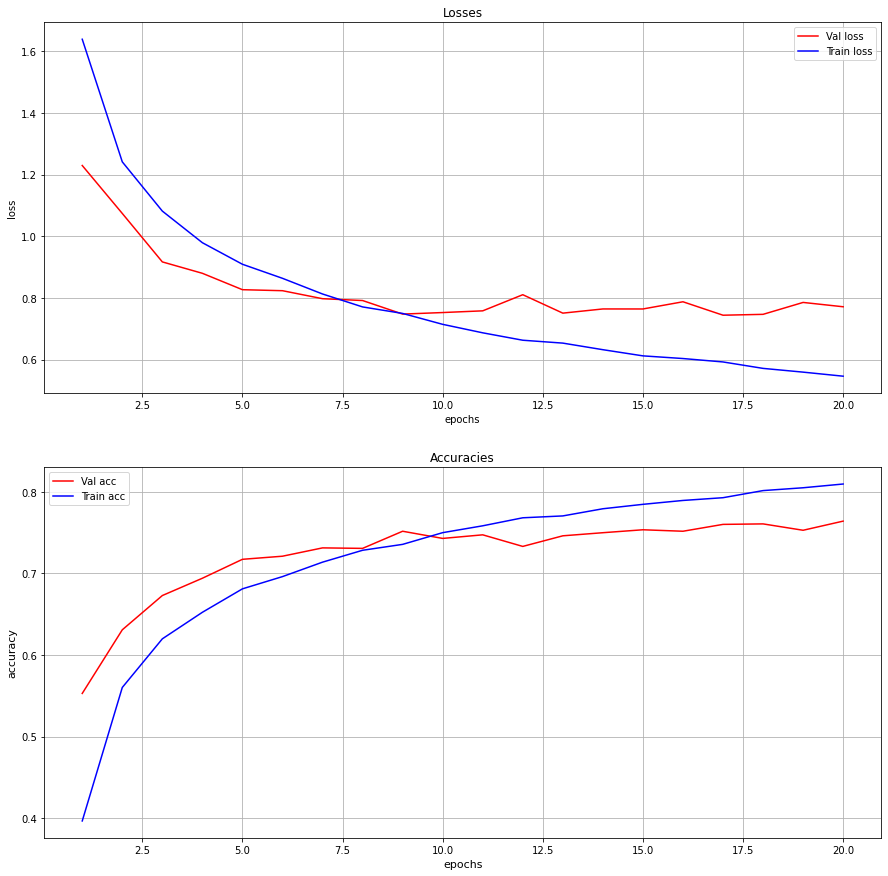

In [16]:
def plot_hist(history):
    plt.figure(figsize=(15,15))
    train_loss = history['loss']
    val_loss = history['val_loss']   
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']    
    epochs = range(1, len(val_loss) + 1)
    
    plt.subplot(211)
    plt.plot(epochs, val_loss, 'r-', label='Val loss')
    plt.plot(epochs, train_loss, 'b-', label='Train loss')
    plt.title('Losses')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()    
    plt.grid(True)
    plt.subplot(212)
    plt.plot(epochs, val_acc, 'r-', label='Val acc')
    plt.plot(epochs, train_acc, 'b-', label='Train acc')
    plt.title('Accuracies')
    plt.xlabel('epochs', fontsize=11, color='black')
    plt.ylabel('accuracy', fontsize=11, color='black')
    plt.legend()
    plt.grid(True)
    
    plt.show()

plot_hist(hist.history)